# AI 1 Exercise 2: "Introduction to Python"

## 2.3 Wine Quality

#### a) You import the data and start exploring to gather a better understanding of it by checking, e.g., data types, number of columns and rows, number of missing values, etc.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# import the data
wine = pd.read_csv("wineQuality.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
# Get an overview of the data
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### b) Then, you decide to bin the “quality” column into two categories “mediocre” and “excellent”. However, before you do, you have to get an overview of the quality values and their distribution by visualizing them in a fitting plot. How many data points did you place in each category?

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


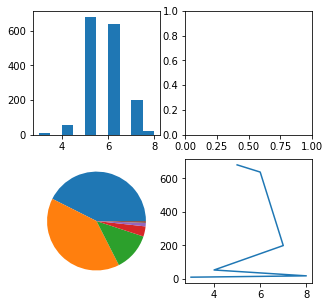

In [27]:
# Getting an overview
count=wine["quality"].value_counts()
quality=pd.Series(wine["quality"])
quality=quality.sort_values(ascending=True)
print(count)
fig, chart = plt.subplots(2, 2, figsize=(5,5))
chart[0,0].hist(quality)
chart[1,0].pie(count)
chart[1,1].plot(count)

In [28]:
# Creating the two bins
bins=(2,5.9,8)
groups=['mediocre','excellent']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=groups)

wine['quality'].unique() # just to display the below output

[mediocre, excellent]
Categories (2, object): [mediocre < excellent]

In [12]:
print(wine['quality'].value_counts())

excellent    855
mediocre     744
Name: quality, dtype: int64


#### c) Afterwards, you set the “quality” column as the label.

In [13]:
import sklearn.preprocessing as spp

LE=spp.LabelEncoder()
wine['quality']=LE.fit_transform(wine['quality'])

wine['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

#### d) Then, you decide to scale the data using the scikit-learn function “StandardScaler”. What does it do?

In [14]:
wine_pre_scale = wine  # if you want to compare the original data later

scaler=spp.StandardScaler()
X = wine.drop('quality',axis=1) # Remove target variable which will be handled separately later
X = scaler.fit_transform(X)

print("SCALED DATA:")
print(X)

print("NON-SCALED DATA:")
print(wine_pre_scale)

SCALED DATA:
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
NON-SCALED DATA:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.

#### e) To finalize your preprocessing, you split the data into a training and test set.

In [15]:
import sklearn.model_selection as model_selection

y = wine['quality'] # Target variable (was previously removed from X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.33, random_state = 42)

print("X_train:")
print(X_train)
print("-----")

print("X_test:")
print(X_test)
print("-----")

print("y_train:")
print(y_train)
print("-----")

print("y_test:")
print(y_test)
print("-----")

X_train:
[[ 2.34429261 -0.99339013  1.12470036 ... -1.23827555  0.54204194
  -0.02157362]
 [-0.93053092  1.2412005  -1.34012182 ...  1.54781404 -0.28414114
   2.23124036]
 [-0.98798397  0.57082331 -1.39147228 ... -0.7199333  -1.22835037
  -0.86637886]
 ...
 [-0.6432657   0.51495855 -1.08336951 ...  1.28864292 -0.69723268
  -0.86637886]
 [-0.24109439 -1.83136161  0.4057939  ...  0.05758008  0.83710732
   1.38643512]
 [-1.44760832 -1.32857872 -0.05636026 ...  0.51112954 -0.69723268
   2.8883111 ]]
-----
X_test:
[[-0.35600048  0.17976995 -0.98066858 ... -0.46076217  0.01092425
  -0.77251161]
 [-0.29854743 -0.15541864 -0.51851442 ...  0.51112954 -1.05131114
  -0.86637886]
 [ 1.36759086  0.79428237 -0.26176211 ... -0.20159105  1.89934271
  -0.49090986]
 ...
 [-0.01128221 -1.21684919  0.61119574 ... -0.0072127   0.66006809
   1.94963861]
 [-0.06873526  4.48135691 -1.39147228 ...  1.41822848 -0.99229806
   0.44776263]
 [ 0.44834214  0.73841761 -0.62121535 ... -0.20159105 -0.69723268
  -0.7725

#### f) You decide to train several models using the following algorithms: Decision Tree, Random Forest, Support Vector Machine, Neural Network, and Linear Regression.


**NOTE:** You will receive a warning that you neural network has not converged yet. To resolve this, you can increase the number of iterations which will lead to a longer run time.

In [16]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [17]:
# Train and Apply on Test Data for the differnt algorithms

# DECISION TREE
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)


# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=150)
forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)


# SUPPORT VECTOR MACHINE
import sklearn.svm as svm

sup = svm.SVC(gamma='auto')
sup.fit(X_train, y_train)
sup_predict=sup.predict(X_test)


# NEURAL NETWORK (MLP = Multi-layer Perceptron)
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(15), random_state=1)
nn.fit(X_train, y_train)
nn_predict = nn.predict(X_test)


# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression 

# X2_test = scaler.transform(X2_test)   EVENTUELL ANWENDEN!!!
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_predict = LR.predict(X_test)

/Users/TimoSturm/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
# Evaluate the Performance of the different Models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# DECISION TREE
print("1. DECISION TREE:")
print(classification_report(y_test, dt_predict))
print(confusion_matrix(y_test, dt_predict))
print("\n")
print("Detailed Accuracy:")
print(accuracy_score(y_test, dt_predict))
print("\n")
print("----------")
print("\n")


# RANDOM FOREST
print("2. RANDOM FOREST:")
print(classification_report(y_test, forest_predict))
print(confusion_matrix(y_test, forest_predict))
print("\n")
print("Detailed Accuracy:")
print(accuracy_score(y_test, forest_predict))
print("\n")
print("----------")
print("\n")


# SUPPORT VECTOR MACHINE
print("3. SUPPORT VECTOR MACHINE:")
print(classification_report(y_test, sup_predict))
print(confusion_matrix(y_test, sup_predict))
print("\n")
print("Detailed Accuracy:")
print(accuracy_score(y_test, sup_predict))
print("\n")
print("----------")
print("\n")


# NEURAL NETWORK
print("4. NEURAL NETWORK:")
print(classification_report(y_test, nn_predict))
print(confusion_matrix(y_test, nn_predict))
print("\n")
print("Detailed Accuracy:")
print(accuracy_score(y_test, nn_predict))
print("\n")
print("----------")
print("\n")


# SPECIAL CASE: Linear Regression performs a regression and not a classification. 
# Thus, we have to apply other evaluation metrics, such as, e.g., root mean squared error.

# LINEAR REGRESSION
from sklearn.metrics import mean_squared_error, explained_variance_score
from math import sqrt

print("5. LINEAR REGRESSION:")
print("Root Mean Squared Error (RMSE):")
print(sqrt(mean_squared_error(y_test, LR_predict)))

1. DECISION TREE:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       290
           1       0.71      0.72      0.72       238

    accuracy                           0.74       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.74      0.74       528

[[221  69]
 [ 67 171]]


Detailed Accuracy:
0.7424242424242424


----------


2. RANDOM FOREST:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       290
           1       0.78      0.76      0.77       238

    accuracy                           0.80       528
   macro avg       0.80      0.80      0.80       528
weighted avg       0.80      0.80      0.80       528

[[240  50]
 [ 56 182]]


Detailed Accuracy:
0.7992424242424242


----------


3. SUPPORT VECTOR MACHINE:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       290
           1      